In [126]:
%matplotlib inline

In [47]:
import dicom, os, sys
import numpy as np
import pandas as pd
from scipy.misc import imresize
import matplotlib.pyplot as plt

# Generate training datasets
- Input images
- Target ROI

In [70]:
PathDicom = "../data/Sunnybrook Cardiac MR Database ContoursPart3"
lstFilesDCM_Training = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".txt" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_Training.append(os.path.join(dirName,filename))

In [87]:
PathDicom = "../data/Sunnybrook Cardiac MR Database DICOMPart3/TrainingDataDICOM"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [98]:
has_contour = [w.split('TrainingDataContours/')[-1] for w in lstFilesDCM_Training]
# Selecting only inside contours
inside_contour = [(w.split('/')[0],w.split('/')[-1][8:12]) for w in has_contour if 'icontour' in w]

In [114]:
input_path = []
for tup in inside_contour:
    k = 0
    while 1:
        
        file = lstFilesDCM[k]
        
        folder = file.split('/')[4]
        filename = file.split('/')[-1]
        
        # Testing if we are in the right folder
        if folder == tup[0] and tup[1] in filename :
            input_path.append(file)
            break
        k = k+1
        continue

In [115]:
print(len(inside_contour),len(input_path))

260 260


In [118]:
import h5py,dicom

In [120]:
n = len(input_path)

OUTPUT = '../data/input_training.h5'

with h5py.File(OUTPUT, 'w') as hf:
    X = hf.create_dataset("X", (n, 64, 64), maxshape=(None, 64, 64))
    for k,filenameDCM in enumerate(input_path):
    # read the file
        try:
            ds = dicom.read_file(filenameDCM)
            # store the raw image data
            if len(ds.pixel_array.shape) == 2:
                X[k,:,:] = imresize(ds.pixel_array,size=(64,64))
        except ValueError:
            continue

In [121]:
file_h5 = h5py.File(OUTPUT, "r")

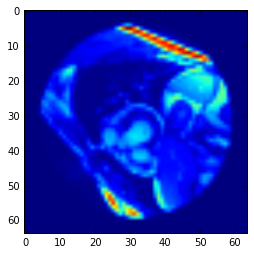

In [127]:
plt.imshow(file_h5["X"][0])

# Generate validation datasets
- Input images
- Target ROI